import necessary libraries.                 
pandas: It helps to load data frame in a 2D array format and performs analysis tasks.                                   
Numpy: It performs large computation very fast.                                   
Matplotlib: This library is used to draw visualizations.                           
Seaborn:library for statistical graphics plotting in Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

load the dataset

In [ ]:
df = pd.read_csv("/content/tesla.csv")

display the first five rows

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


display total number of rows and columns

In [ ]:
df.shape

(1692, 7)

describe name of all columns in the dataset

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

display datatype of the values in rows

In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


describe the dataset according to different statistical divisions

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


display all information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


displays the number of null rows

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


there are no null values in the dataset

display unique values from 'open' column

In [ ]:
df['Open'].unique()

array([ 19.      ,  25.790001,  25.      , ..., 246.210007, 246.110001,
       257.      ])

In [ ]:
df['Open'].value_counts()

,count
Open,
30.000000,6
28.000000,6
28.500000,5
220.000000,5
33.500000,4
...,...
84.809998,1
86.370003,1
88.500000,1


check if data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same for each row

In [ ]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [ ]:
df = df.drop(['Adj Close'], axis=1)

The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

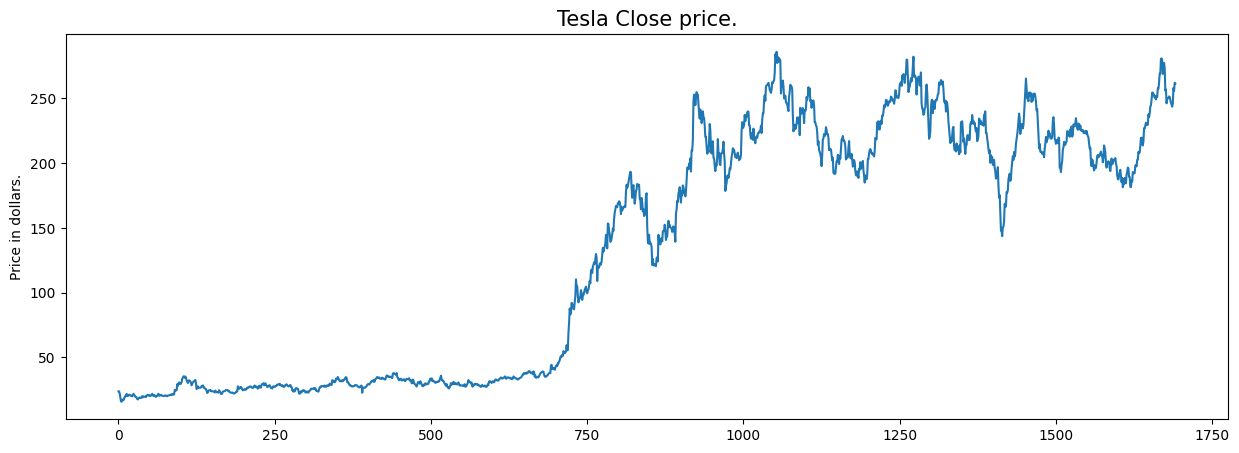

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

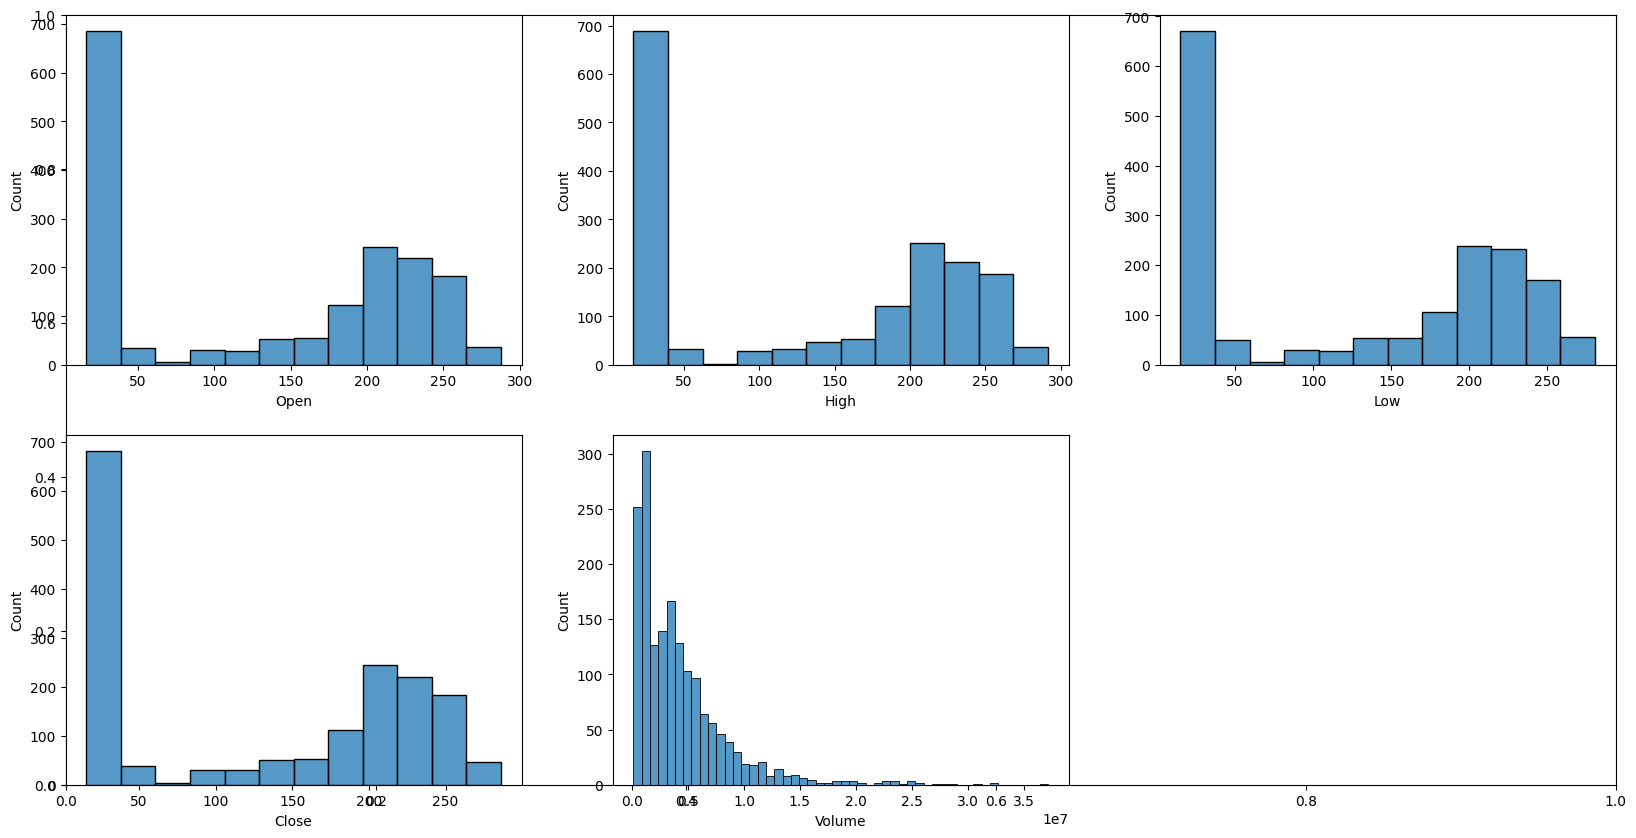

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(df[col])
plt.show()

by distribution plot, in open, high, low and close data, we can see two peaks that means the data is varied significantly tow regions and the volume data is only peaked in one region i.e left-skewed.

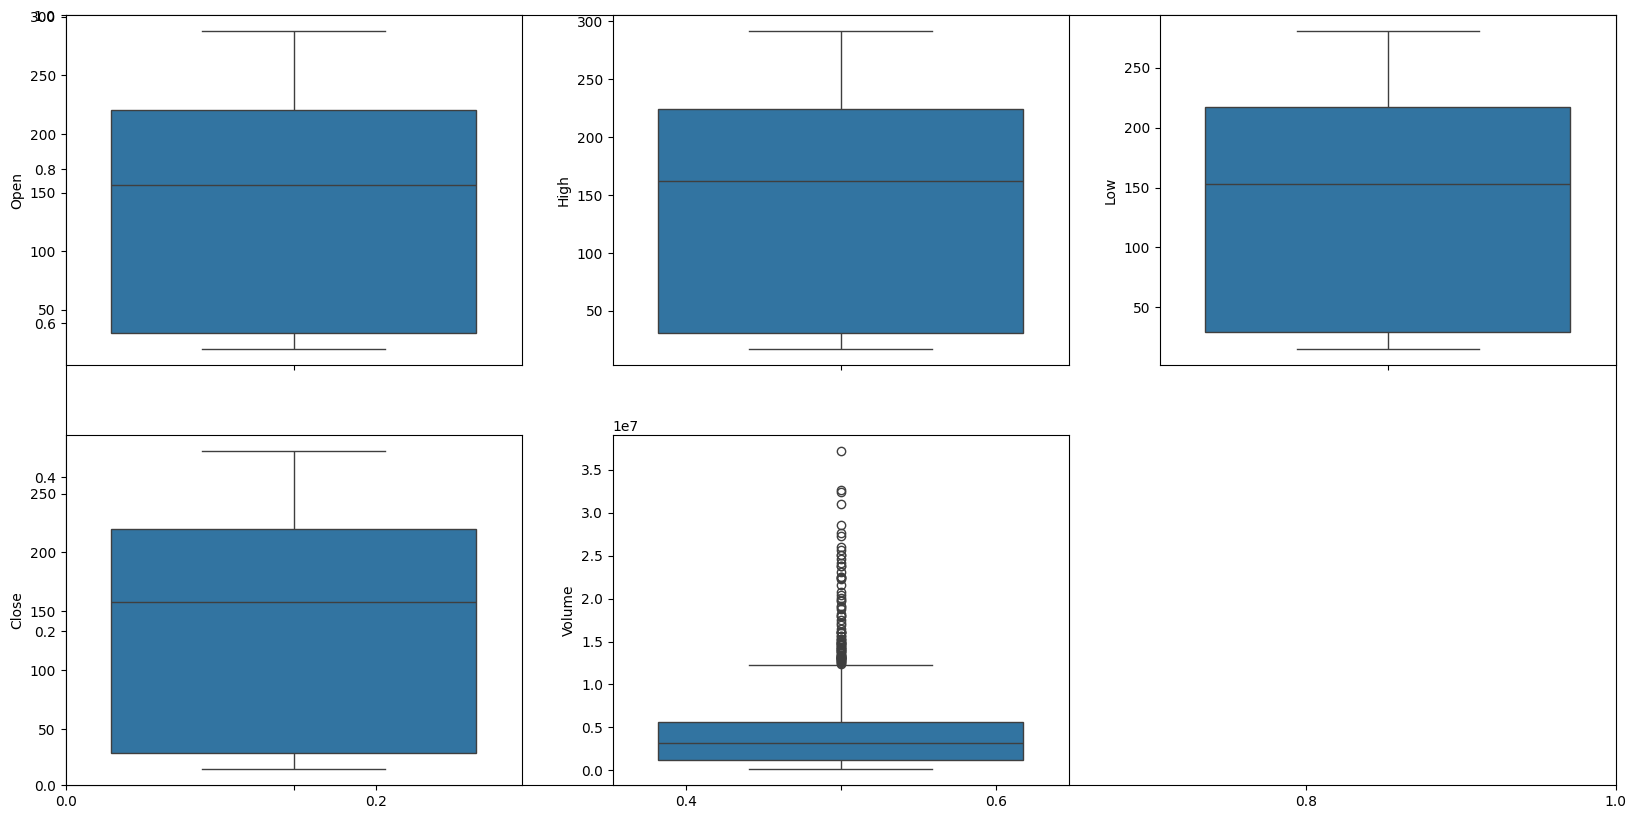

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

from above boxplots, we can conclude that only volume data contains outliers.

display coorelation among all features by correlation matrix

In [ ]:
correlation_matrix=df[['Open','High','Low','Close','Volume']].corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.999623  0.999605  0.999233  0.407515
High    0.999623  1.000000  0.999521  0.999691  0.416466
Low     0.999605  0.999521  1.000000  0.999656  0.397615
Close   0.999233  0.999691  0.999656  1.000000  0.406907
Volume  0.407515  0.416466  0.397615  0.406907  1.000000


plotting heat map

The correlation heatmap shows that all variables (Open, High, Low, and Adjusted Close) have extremely high correlations with one another, with correlation values very close to 1.00.
This suggests that changes in one variable are almost perfectly mirrored by changes in the others.
Such strong correlations indicate redundancy in these features, implying that they move together and likely provide similar information.
For further analysis or modeling, selecting one representative variable or using dimensionality reduction techniques might be beneficial.

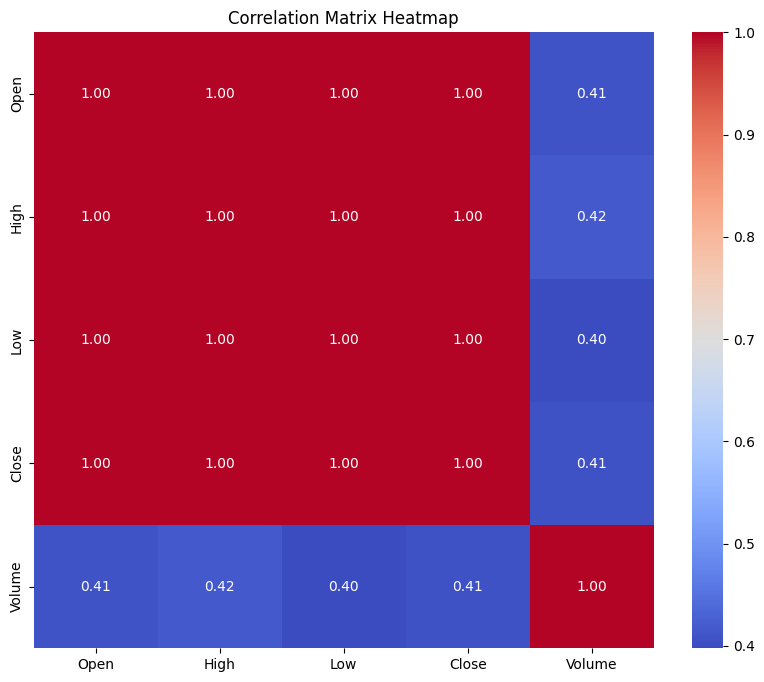

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

The distribution of trading volume shows a right-skewed pattern, with most observations concentrated at lower values.
The majority of trading volumes fall between 0 and 5 million, with frequency declining as volume increases.
A small number of trading days experienced exceptionally high volumes, contributing to the tail on the right.
This indicates that trading volume is unevenly distributed, with extreme values being less frequent but significantly larger.


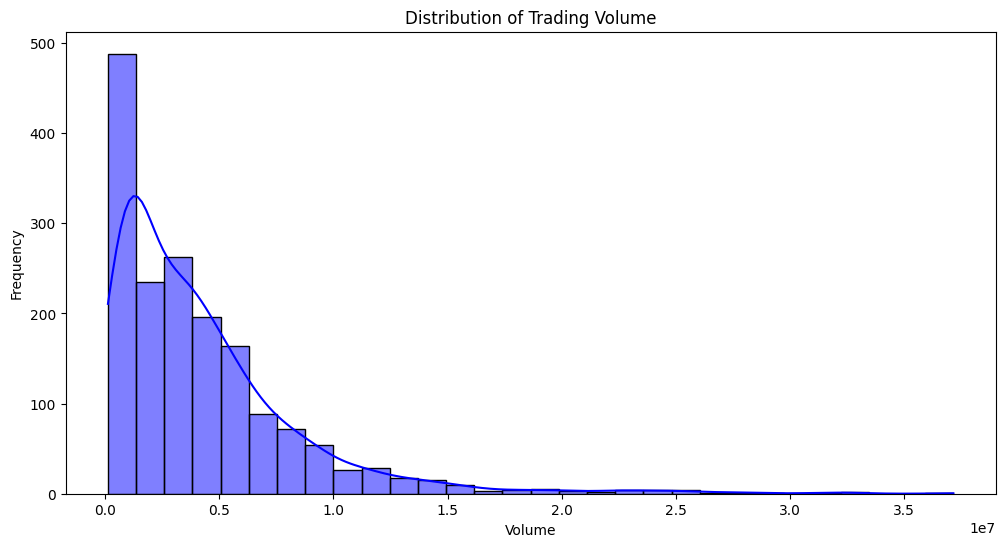

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

The box plot displays the closing price volatility of a stock from 2010 to 2017, revealing significant trends over the years. Between 2010 and 2012, the stock prices remain relatively low and stable, as indicated by the narrow interquartile ranges and smaller medians. In 2013, there is a sharp increase in both price and volatility, with a wider spread suggesting greater price dispersion. This volatility reaches its peak in 2014 and 2015, where the prices are higher, and the range of variation is notably broad. By 2016, prices stabilize somewhat at elevated levels, but the presence of a few outliers indicates minor fluctuations. In 2017, the stock achieves further stabilization, showing higher median prices and reduced volatility compared to earlier years, marking a period of relative consistency.









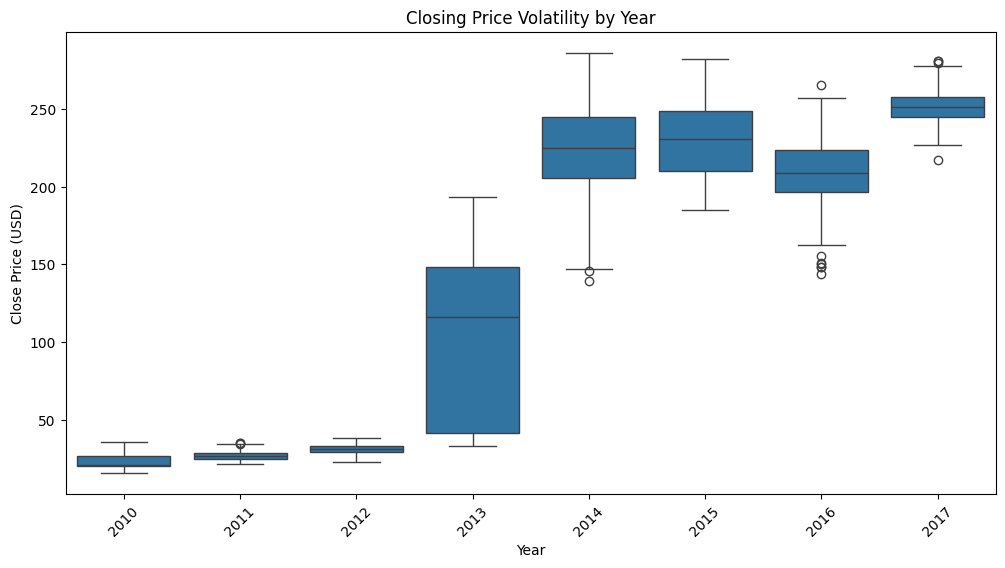

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Closing Price Volatility by Year')
plt.xlabel('Year')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.




In [ ]:
splitted = df['Date'].dt.strftime('%m/%d/%Y').str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,Year,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,-4.889999,7.459999,0,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,1.960001,7.120001,1,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,3.040001,5.650000,0,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,3.799999,4.390001,0,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,3.889999,4.170000,0,6,7,2010


 we can have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.




In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Year,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,-4.889999,7.459999,0,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,1.960001,7.120001,1,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,3.040001,5.650000,0,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,3.799999,4.390001,0,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,3.889999,4.170000,0,6,7,2010,0


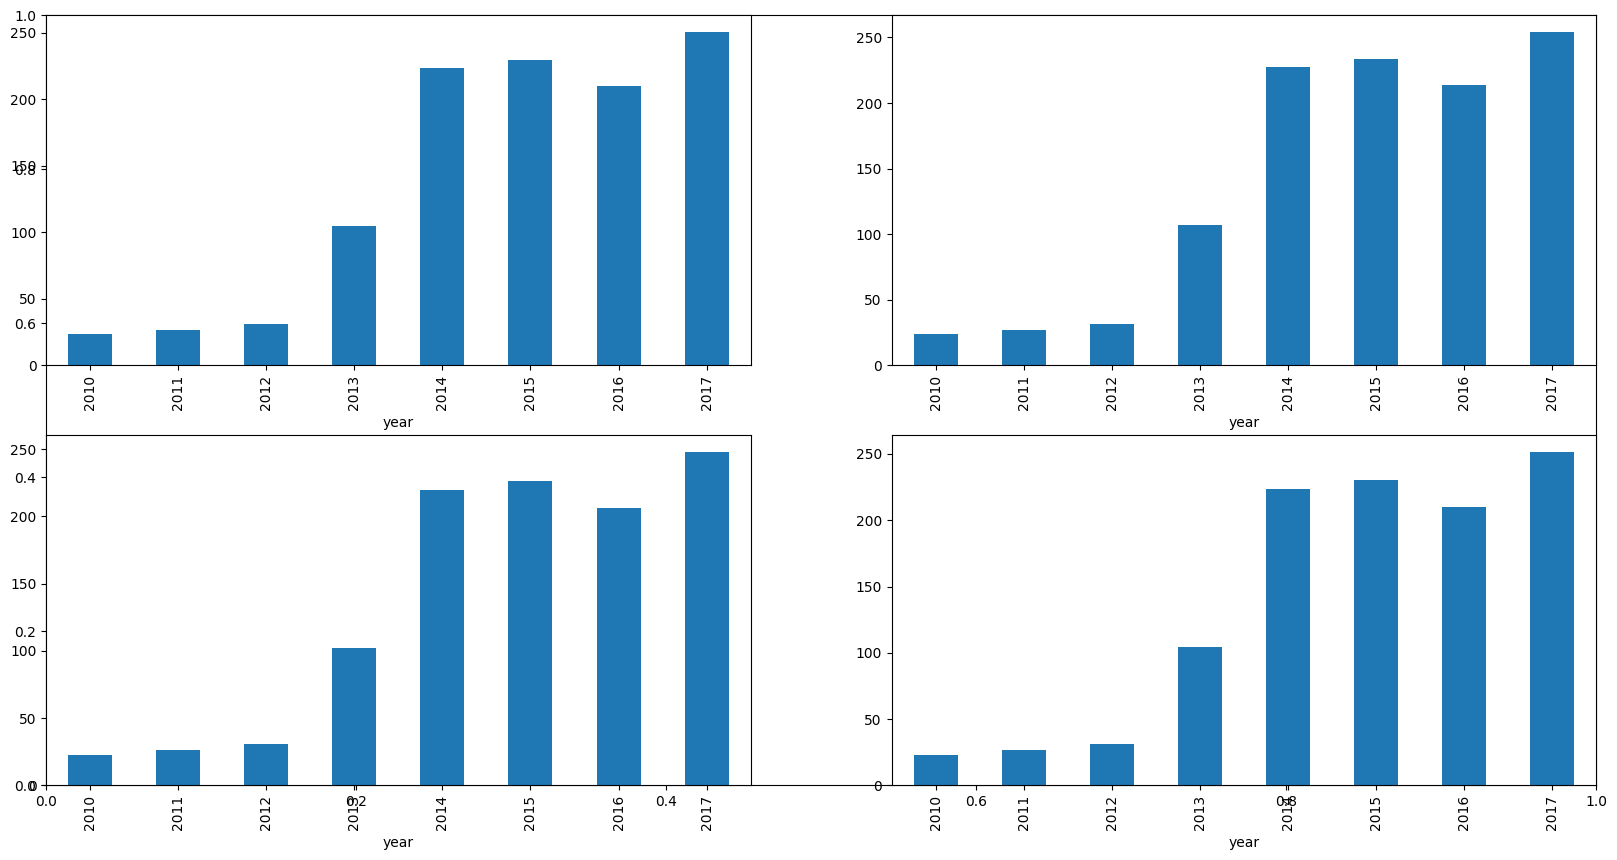

In [ ]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.

In [ ]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Year,Open_Close_Spread,High_Low_Spread,Quarter_End_Flag,day,month,year
is_quarter_end,,,,,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,2013.353464,0.016030,4.925391,0.000000,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,2013.314488,0.006714,4.471254,0.035336,15.657244,7.584806,2013.314488


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open_Close_Spread'] = df['Open'] - df['Close']
df['High_Low_Spread'] = df['High'] - df['Low']
df['Quarter_End_Flag'] = df['Date'].dt.is_quarter_end.astype(int)

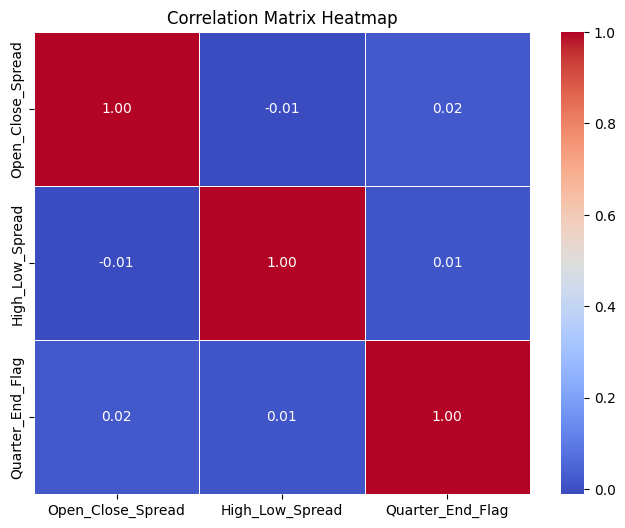

In [ ]:
correlation_matrix_spread = df[['Open_Close_Spread', 'High_Low_Spread', 'Quarter_End_Flag']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_spread, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
scaling_columns = ['Volume', 'Open_Close_Spread', 'High_Low_Spread']
scaler = MinMaxScaler()
data_scaled = df.copy()
data_scaled[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [ ]:
correlation_matrix_final = df.corr()
threshold = 0.8
correlated_features = set()
for i in range(len(correlation_matrix_final.columns)):
    for j in range(i):
        if abs(correlation_matrix_final.iloc[i, j]) > threshold:
            correlated_features.add(correlation_matrix_final.columns[i])
df_selected = df.drop(columns=correlated_features)
print("Remaining features:", df_selected.columns)

Remaining features: Index(['Date', 'Volume', 'Open_Close_Spread', 'High_Low_Spread',
       'Quarter_End_Flag'],
      dtype='object')


Thus the features selected are Volume, Open_Colse_Spread, High_Low_Spread and Quater_End_final

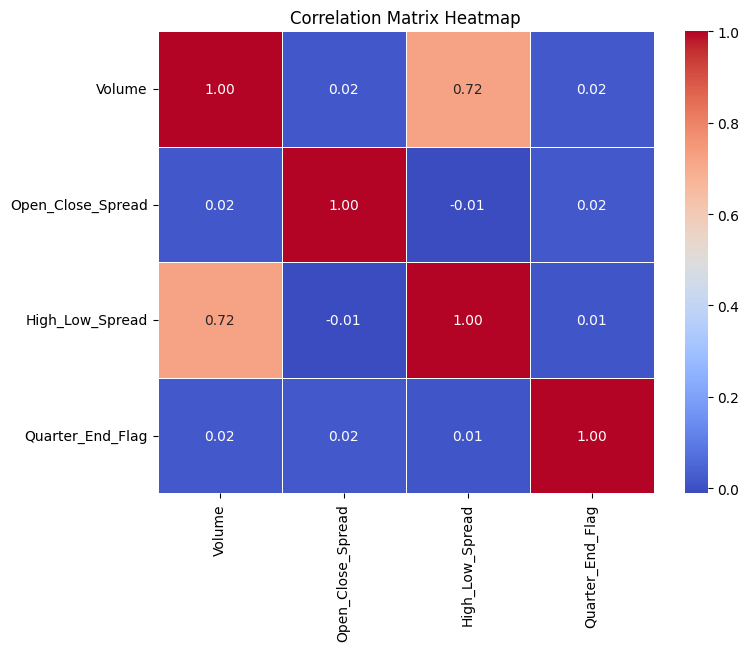

In [ ]:
correlation_matrix_features = df[['Volume','Open_Close_Spread', 'High_Low_Spread', 'Quarter_End_Flag']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()